# Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer

# import mlflow
import warnings
# mlflow.sklearn.autolog()
warnings.filterwarnings('ignore')
import os

## Объединение датасетов

### Загрузка данных

In [2]:
data1 = pd.read_csv("data/BankChurners_1.csv")
data2 = pd.read_csv("data/Churn_Modeling_1.csv")

In [3]:
data1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
data2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
data2.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Приведение наименований и значений столбцов к общему виду

In [7]:
# Приведем колонку CreditScore к диапазону от 0 до 1, т.к. во втором датасете такой формат

data2['CreditScore'] = data2['CreditScore'].apply(lambda x: x - data2['CreditScore'].min())
data2['CreditScore'] = data2['CreditScore'].apply(lambda x: x / data2['CreditScore'].max())

Переименуем столбцы для лучшего понимания и приведем названия 2ух датасетов к общему виду

In [8]:
data1.rename(columns = {
    'CLIENTNUM':'Client_id',
    'Attrition_Flag':'res',
    'Customer_Age':'Client_age',
    'Income_Category':'Salary',
    'Dependent_count':'Numb_of_Prod',
    'Card_Category':'HasCrCard',
    'Months_on_book':'Numb_of_years',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'CreditScore',
    }, inplace = True)

#Добавление важных столбоцов, отсутствующих в 1ом датасете с пустыми значениям
data1['Balance'] = [None for _ in range(data1.shape[0])]
data1['IsActiveMember'] = [None for _ in range(data1.shape[0])]

In [9]:
data2.rename(columns = {
    'CustomerId':'Client_id',
    'Exited':'res',
    'Age':'Client_age',
    'EstimatedSalary':'Salary',
    'NumOfProducts':'Numb_of_Prod',
    'Tenure':'Numb_of_years',
    }, inplace = True) 

In [10]:
data1.columns

Index(['Client_id', 'res', 'Client_age', 'Gender', 'Numb_of_Prod',
       'Education_Level', 'Marital_Status', 'Salary', 'HasCrCard',
       'Numb_of_years', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'CreditScore', 'Balance', 'IsActiveMember'],
      dtype='object')

In [11]:
data2.columns

Index(['RowNumber', 'Client_id', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Client_age', 'Numb_of_years', 'Balance', 'Numb_of_Prod',
       'HasCrCard', 'IsActiveMember', 'Salary', 'res'],
      dtype='object')

##### Приведем значения в столбцов к единому виду

In [12]:
#Приведем значения Salary к целому числовому типу (int64)

data2['Salary'] = data2['Salary'].astype('int64')

In [13]:
data1.loc[data1['res'] == 'Existing Customer', 'res'] = 0
data1.loc[data1['res'] == 'Attrited Customer', 'res'] = 1

data1.loc[data1['Gender'] == 'M', 'Gender'] = 'Male'
data1.loc[data1['Gender'] == 'F', 'Gender'] = 'Female'

data1.loc[(data1['HasCrCard'] == 'Blue') | (data1['HasCrCard'] == 'Gold') | (data1['HasCrCard'] == 'Silver') | (data1['HasCrCard'] == 'Platinum'), 'HasCrCard'] = 1

data1.loc[data1['Numb_of_years'] > 0 , 'Numb_of_years'] = data1['Numb_of_years']//12


#Приведем столбец Salary 2ого датасета к категориальному виду,как это представлено в 1ом датасете
data2.loc[data2['Salary'] < 40000, 'Salary'] = 100
data2.loc[(40000 <= data2['Salary']) & (data2['Salary'] < 60000), 'Salary'] = 50000
data2.loc[(60000 <= data2['Salary']) & (data2['Salary'] < 80000), 'Salary'] = 70000
data2.loc[(80000 <= data2['Salary']) & (data2['Salary'] < 120000), 'Salary'] = 90000
data2.loc[data2['Salary'] >= 120000, 'Salary'] = 130000
data2 = data2.replace({'Salary':{100:'Less than $40K', 50000:'$40K - $60K', 70000:'$60K - $80K', 90000:'$80K - $120K', 130000:'$120K +'}})

In [14]:
#Приведем значения Salary к целому числовому типу (int64)

data1['res'] = data1['res'].astype('int64')
data2['HasCrCard'] = data2['HasCrCard'].astype('int64')

#### Объединение

In [15]:
#Поскольку мы заранее привели столбцы к общему виду и добавили недостающие столбцы, то используем inner (так мы отбросим все лишние столбцы)

df = pd.concat([data1,data2], axis=0, join='inner')

In [16]:
df.columns

Index(['Client_id', 'res', 'Client_age', 'Gender', 'Numb_of_Prod', 'Salary',
       'HasCrCard', 'Numb_of_years', 'CreditScore', 'Balance',
       'IsActiveMember'],
      dtype='object')

In [17]:
df.isna().sum()

Client_id             0
res                   0
Client_age            0
Gender                0
Numb_of_Prod          0
Salary                0
HasCrCard             0
Numb_of_years         0
CreditScore           0
Balance           10127
IsActiveMember    10127
dtype: int64

## Предварительная обработка данных

### Разделение на train и test

In [18]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42) #ставим random_state, чтобы псевдослучайные числа были одинаковыми при каждом вызове

In [19]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(20127, 11)
(15095, 11)
(5032, 11)


### Очистка и редактирование данных

#### Преобразование категориальных переменных

In [20]:
# Применяем OneHot Encoder к столбцу 'Gender'
oh_encoder = ce.OneHotEncoder(cols=['Gender'], use_cat_names=True)
df_train = oh_encoder.fit_transform(df_train)
df_test = oh_encoder.transform(df_test)

# Применяем TargetEncoder к столбцу 'Salary'
te_encoder = ce.TargetEncoder(cols=['Salary'])
df_train = te_encoder.fit_transform(df_train, df_train['res']) # здесь 'res' используется как целевая переменная для TargetEncoder
df_test = te_encoder.transform(df_test, df_test['res'])

In [21]:
# Сохраняем энкодеры

with open('models/onehot_encoder.pkl','wb') as f:
    pickle.dump(oh_encoder, f)
with open('models/target_encoder.pkl','wb') as f:
    pickle.dump(te_encoder, f)

In [22]:
df_train.head()

,Client_id,res,Client_age,Gender_Female,Gender_Male,Numb_of_Prod,Salary,HasCrCard,Numb_of_years,CreditScore,Balance,IsActiveMember
7502,778231983,0,49,1,0,4,0.162582,1,3,0.99978,NaN,None
3601,712597233,1,37,0,1,2,0.162582,1,3,0.00538,NaN,None
8206,713759583,0,54,1,0,3,0.186047,1,3,0.99997,NaN,None
8801,15606115,1,52,1,0,1,0.202517,1,6,0.32000,191665.21,1
6364,15663421,0,28,0,1,2,0.168122,1,6,0.35400,128396.33,0


In [23]:
#У нас всего 2 категории, поэтому нет смысла хранить 2 столбца

df_train = df_train.drop('Gender_Female', axis=1)
df_train.rename(columns = {'Gender_Male':'Gender'}, inplace=True)

df_test = df_test.drop('Gender_Female', axis=1)
df_test.rename(columns = {'Gender_Male':'Gender'}, inplace=True)

In [24]:
df_train.head()

,Client_id,res,Client_age,Gender,Numb_of_Prod,Salary,HasCrCard,Numb_of_years,CreditScore,Balance,IsActiveMember
7502,778231983,0,49,0,4,0.162582,1,3,0.99978,NaN,None
3601,712597233,1,37,1,2,0.162582,1,3,0.00538,NaN,None
8206,713759583,0,54,0,3,0.186047,1,3,0.99997,NaN,None
8801,15606115,1,52,0,1,0.202517,1,6,0.32000,191665.21,1
6364,15663421,0,28,1,2,0.168122,1,6,0.35400,128396.33,0


#### Заполнение пропущенных значений

In [25]:
#Прежде, чем использовать функции для заполнения пропущенных значений необходимо избавиться от не влияющих на результат столбцов (id)

df_train = df_train.drop('Client_id', axis=1)
df_test = df_test.drop('Client_id', axis=1)

In [26]:
df_train.head()

,res,Client_age,Gender,Numb_of_Prod,Salary,HasCrCard,Numb_of_years,CreditScore,Balance,IsActiveMember
7502,0,49,0,4,0.162582,1,3,0.99978,NaN,None
3601,1,37,1,2,0.162582,1,3,0.00538,NaN,None
8206,0,54,0,3,0.186047,1,3,0.99997,NaN,None
8801,1,52,0,1,0.202517,1,6,0.32000,191665.21,1
6364,0,28,1,2,0.168122,1,6,0.35400,128396.33,0


In [27]:
df_test.head()

,res,Client_age,Gender,Numb_of_Prod,Salary,HasCrCard,Numb_of_years,CreditScore,Balance,IsActiveMember
5433,0,37,1,1,0.162582,1,2,0.45400,127261.35,0
2928,1,39,0,1,0.182696,1,0,0.63600,122104.79,0
5702,0,52,0,3,0.186047,1,3,0.99965,NaN,None
3062,0,44,1,3,0.168122,1,3,0.99988,NaN,None
9199,0,49,0,4,0.186047,1,3,0.99988,NaN,None


Здесь мы используем модуль ___KNN-Imputer___ из библиотеки Scikit-Learn для заполнения отсутствующих значений в столбцах Balance и IsActiveMember. Мы создаем Imputer с параметром n_neighbors=5, а затем используем его для заполнения отсутствующих значений в этих столбцах.

In [28]:
# создание объекта KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='distance', add_indicator=True)

# обучение и преобразование данных
df_imputed_train = imputer.fit_transform(df_train)
df_imputed_test = imputer.transform(df_test)

In [29]:
# Сохраняем импутер

with open('models/knn_imputer.pkl','wb') as f:
    pickle.dump(imputer, f)

In [30]:
#Преобразуем массив, полученный в результате применения инпутера в датафрейм

df_train = pd.DataFrame(df_imputed_train[:,:-2], columns=df_train.columns)
df_test = pd.DataFrame(df_imputed_test[:,:-2], columns=df_test.columns)
df_train.head()

,res,Client_age,Gender,Numb_of_Prod,Salary,HasCrCard,Numb_of_years,CreditScore,Balance,IsActiveMember
0,0.0,49.0,0.0,4.0,0.162582,1.0,3.0,0.99978,86095.520421,0.416900
1,1.0,37.0,1.0,2.0,0.162582,1.0,3.0,0.00538,34900.784672,1.000000
2,0.0,54.0,0.0,3.0,0.186047,1.0,3.0,0.99997,26866.279486,0.806936
3,1.0,52.0,0.0,1.0,0.202517,1.0,6.0,0.32000,191665.210000,1.000000
4,0.0,28.0,1.0,2.0,0.168122,1.0,6.0,0.35400,128396.330000,0.000000


In [31]:
# Округляем значения в колонке IsActiveMember (так как временные значения лежат в диапазоне от 0 до 1)

df_train['IsActiveMember'] = df_train['IsActiveMember'].apply(round)
df_test['IsActiveMember'] = df_test['IsActiveMember'].apply(round)

In [32]:
df_train.head()

,res,Client_age,Gender,Numb_of_Prod,Salary,HasCrCard,Numb_of_years,CreditScore,Balance,IsActiveMember
0,0.0,49.0,0.0,4.0,0.162582,1.0,3.0,0.99978,86095.520421,0
1,1.0,37.0,1.0,2.0,0.162582,1.0,3.0,0.00538,34900.784672,1
2,0.0,54.0,0.0,3.0,0.186047,1.0,3.0,0.99997,26866.279486,1
3,1.0,52.0,0.0,1.0,0.202517,1.0,6.0,0.32000,191665.210000,1
4,0.0,28.0,1.0,2.0,0.168122,1.0,6.0,0.35400,128396.330000,0


### Feature transformation

In [33]:
# Определяем числовые признаки для стандартизации (Признак CreditScore уже стантартизован)
num_cols = ['Client_age', 'Numb_of_Prod', 'Salary', 'Numb_of_years', 'Balance']

# Создаем объект StandardScaler
scaler = StandardScaler()

# Стандартизируем числовые признаки
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [34]:
# Сохраняем Scaler

with open('models/scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

In [35]:
df_train.head()

,res,Client_age,Gender,Numb_of_Prod,Salary,HasCrCard,Numb_of_years,CreditScore,Balance,IsActiveMember
0,0.0,0.635602,0.0,1.904690,-1.525104,1.0,-0.342854,0.99978,0.264880,0
1,1.0,-0.559889,1.0,0.058285,-1.525104,1.0,-0.342854,0.00538,-0.771463,1
2,0.0,1.133723,0.0,0.981488,0.218425,1.0,-0.342854,0.99997,-0.934107,1
3,1.0,0.934475,0.0,-0.864918,1.442301,1.0,0.898047,0.32000,2.401944,1
4,0.0,-1.456507,1.0,0.058285,-1.113461,1.0,0.898047,0.35400,1.121182,0


In [36]:
df_test.head()

,res,Client_age,Gender,Numb_of_Prod,Salary,HasCrCard,Numb_of_years,CreditScore,Balance,IsActiveMember
0,0.0,-0.559889,1.0,-0.864918,-1.525104,1.0,-0.756488,0.45400,1.098206,0
1,1.0,-0.360640,0.0,-0.864918,-0.030548,1.0,-1.583755,0.63600,0.993821,0
2,0.0,0.934475,0.0,0.981488,0.218425,1.0,-0.342854,0.99965,-0.922659,1
3,0.0,0.137481,1.0,0.981488,-1.113461,1.0,-0.342854,0.99988,-0.849939,1
4,0.0,0.635602,0.0,1.904690,0.218425,1.0,-0.342854,0.99988,0.264956,0


###  Feature selection

#### Масштабирование признаков

In [37]:
# Рассчитываем IQR для столбца 'Salary'
Q1 = df_train['Salary'].quantile(0.25)
Q3 = df_train['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Удаляем выбросы
df_train = df_train[(df_train['Salary'] >= Q1 - 1.5*IQR) & (df_train['Salary'] <= Q3 + 1.5*IQR)]
df_test = df_test[(df_test['Salary'] >= Q1 - 1.5*IQR) & (df_test['Salary'] <= Q3 + 1.5*IQR)]


#### Корреляция

Text(0.5, 1.0, 'Correlation Matrix')

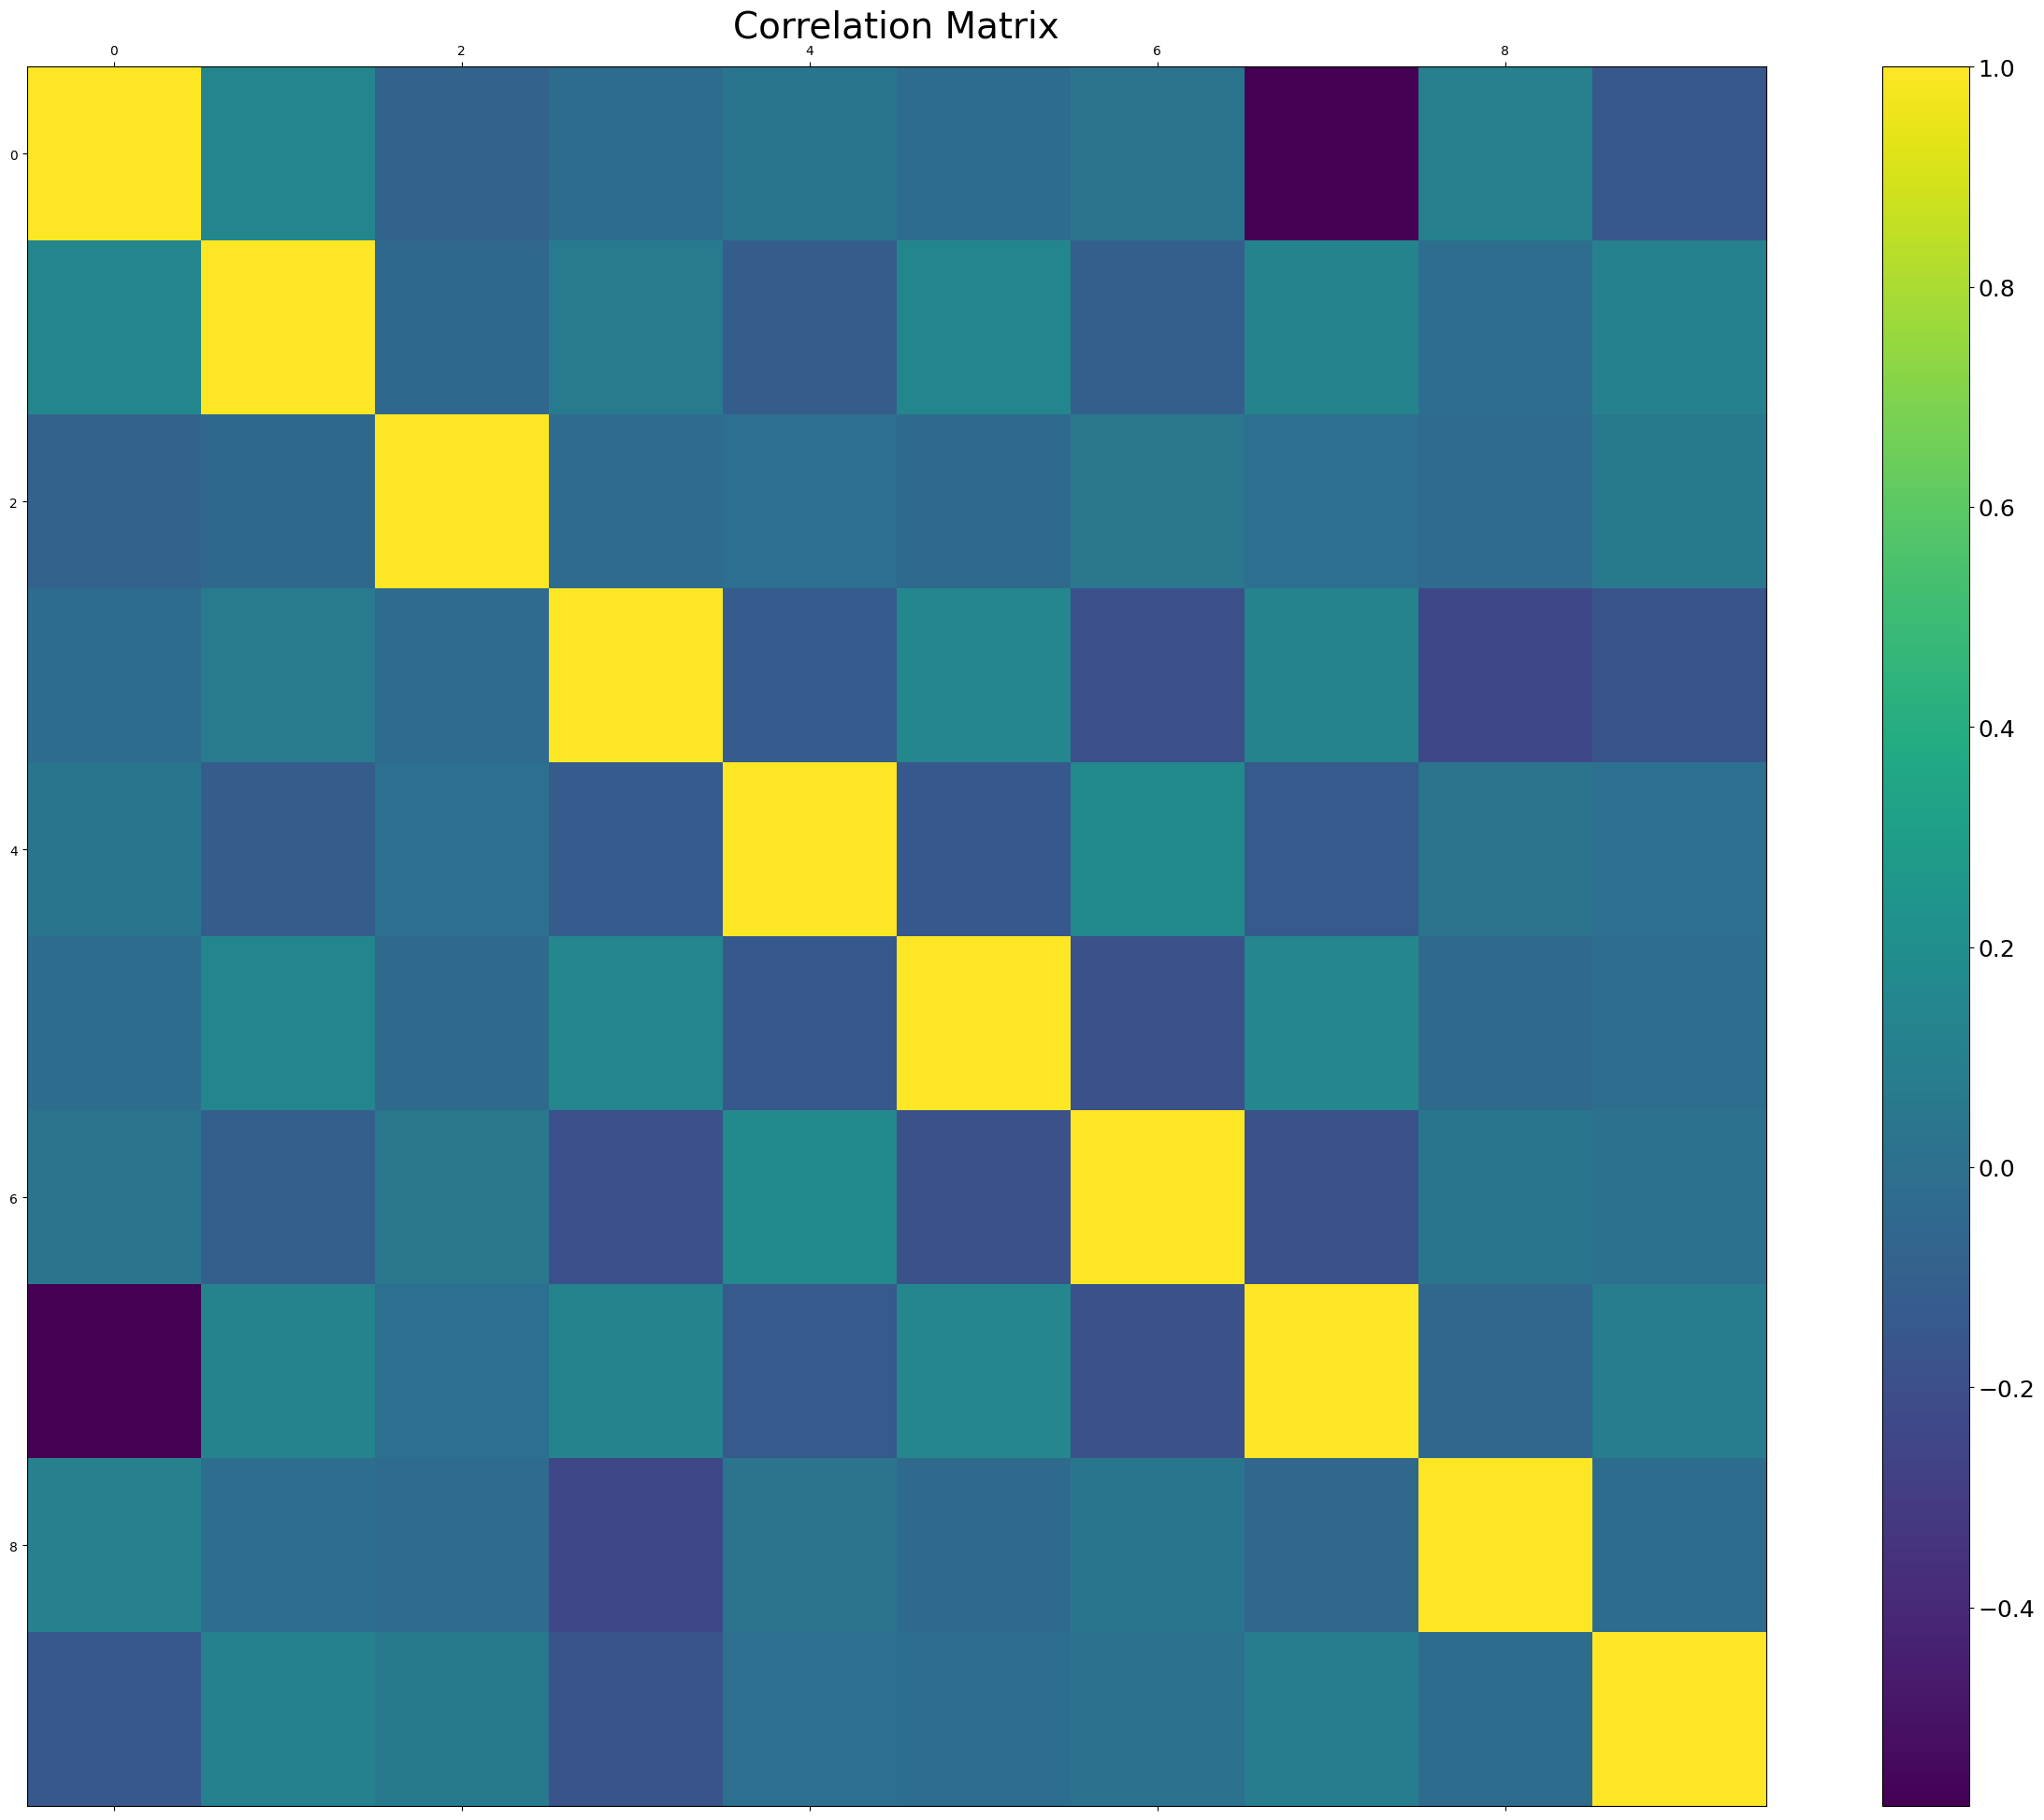

In [38]:
corr_matrix = df_train.corr()
import matplotlib.pyplot as plt

f = plt.figure(figsize=(32, 24))
plt.matshow(corr_matrix, fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.title('Correlation Matrix', fontsize=28)

<br>

## Генерация и увеличение данных

#### Data generation and augmentation

In [39]:
#Высчитаем количество строк, которое нужно добавить, чтобы train|test == 80|20
# x - всего строк
# y - добавляемое кол-во строк
# 0,75x + y - 80% (см. разделение на train|test выше)
# 0,25x     - 20%
# 0,25x*0,8 == 0,75x*0,2 + y*0,2
#     0,05x == 0,2y
#         y == 0,25x
numb_of_plus_str = round(df.shape[0] * 0.25)
numb_of_plus_str

5032

In [40]:
data = df_train

# генерация новых данных
new_data = pd.DataFrame(columns=data.columns)

for _ in range(numb_of_plus_str):
    # выбираем случайные индексы из исходного датасета
    indices = np.random.choice(data.index, size=10)

    # создаем новую строку, как среднее выбранных строк
    new_row = data.loc[indices].mean()

    # добавляем новую строку в новый датасет
    pd.concat([new_data,new_row], ignore_index=True)
    #new_data = new_data.concat(new_row, ignore_index=True)

df_train = pd.concat([df_train,new_data], axis=0, join='inner', ignore_index=True)

In [41]:
df_train

,res,Client_age,Gender,Numb_of_Prod,Salary,HasCrCard,Numb_of_years,CreditScore,Balance,IsActiveMember
0,0.0,0.635602,0.0,1.904690,-1.525104,1.0,-0.342854,0.99978,0.264880,0
1,1.0,-0.559889,1.0,0.058285,-1.525104,1.0,-0.342854,0.00538,-0.771463,1
2,0.0,1.133723,0.0,0.981488,0.218425,1.0,-0.342854,0.99997,-0.934107,1
3,1.0,0.934475,0.0,-0.864918,1.442301,1.0,0.898047,0.32000,2.401944,1
4,0.0,-1.456507,1.0,0.058285,-1.113461,1.0,0.898047,0.35400,1.121182,0
...,...,...,...,...,...,...,...,...,...,...
15090,0.0,1.133723,1.0,-0.864918,1.442301,0.0,-1.170121,0.70000,0.129659,1
15091,1.0,1.332972,1.0,0.058285,1.442301,1.0,1.311680,0.42200,1.614359,0
15092,0.0,-0.061768,0.0,1.904690,0.218425,1.0,-0.756488,0.99994,-0.235654,0
15093,0.0,-0.261016,1.0,0.981488,-1.525104,1.0,-0.756488,0.99996,-0.565819,1


#### Сохранение данных

In [42]:
df_train.to_csv('data/train_data_processed.csv')
df_test.to_csv('data/test_data_processed.csv')